In [3]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier


X = iris["data"] 
y = iris["target"]

iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(X,y)
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)


sepal length (cm) 0.10206336240555519
sepal width (cm) 0.02338202719988454
petal length (cm) 0.42568250518584616
petal width (cm) 0.4488721052087141


In [6]:
#Adaboost classifier - 200 decision stumps
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X, y)



AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

# Gradient Boosting 

In [7]:
# make a decision tree 

from sklearn.tree import DecisionTreeRegressor
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)



DecisionTreeRegressor(max_depth=2)

In [8]:
# get the residual and train second tree on it

y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2)

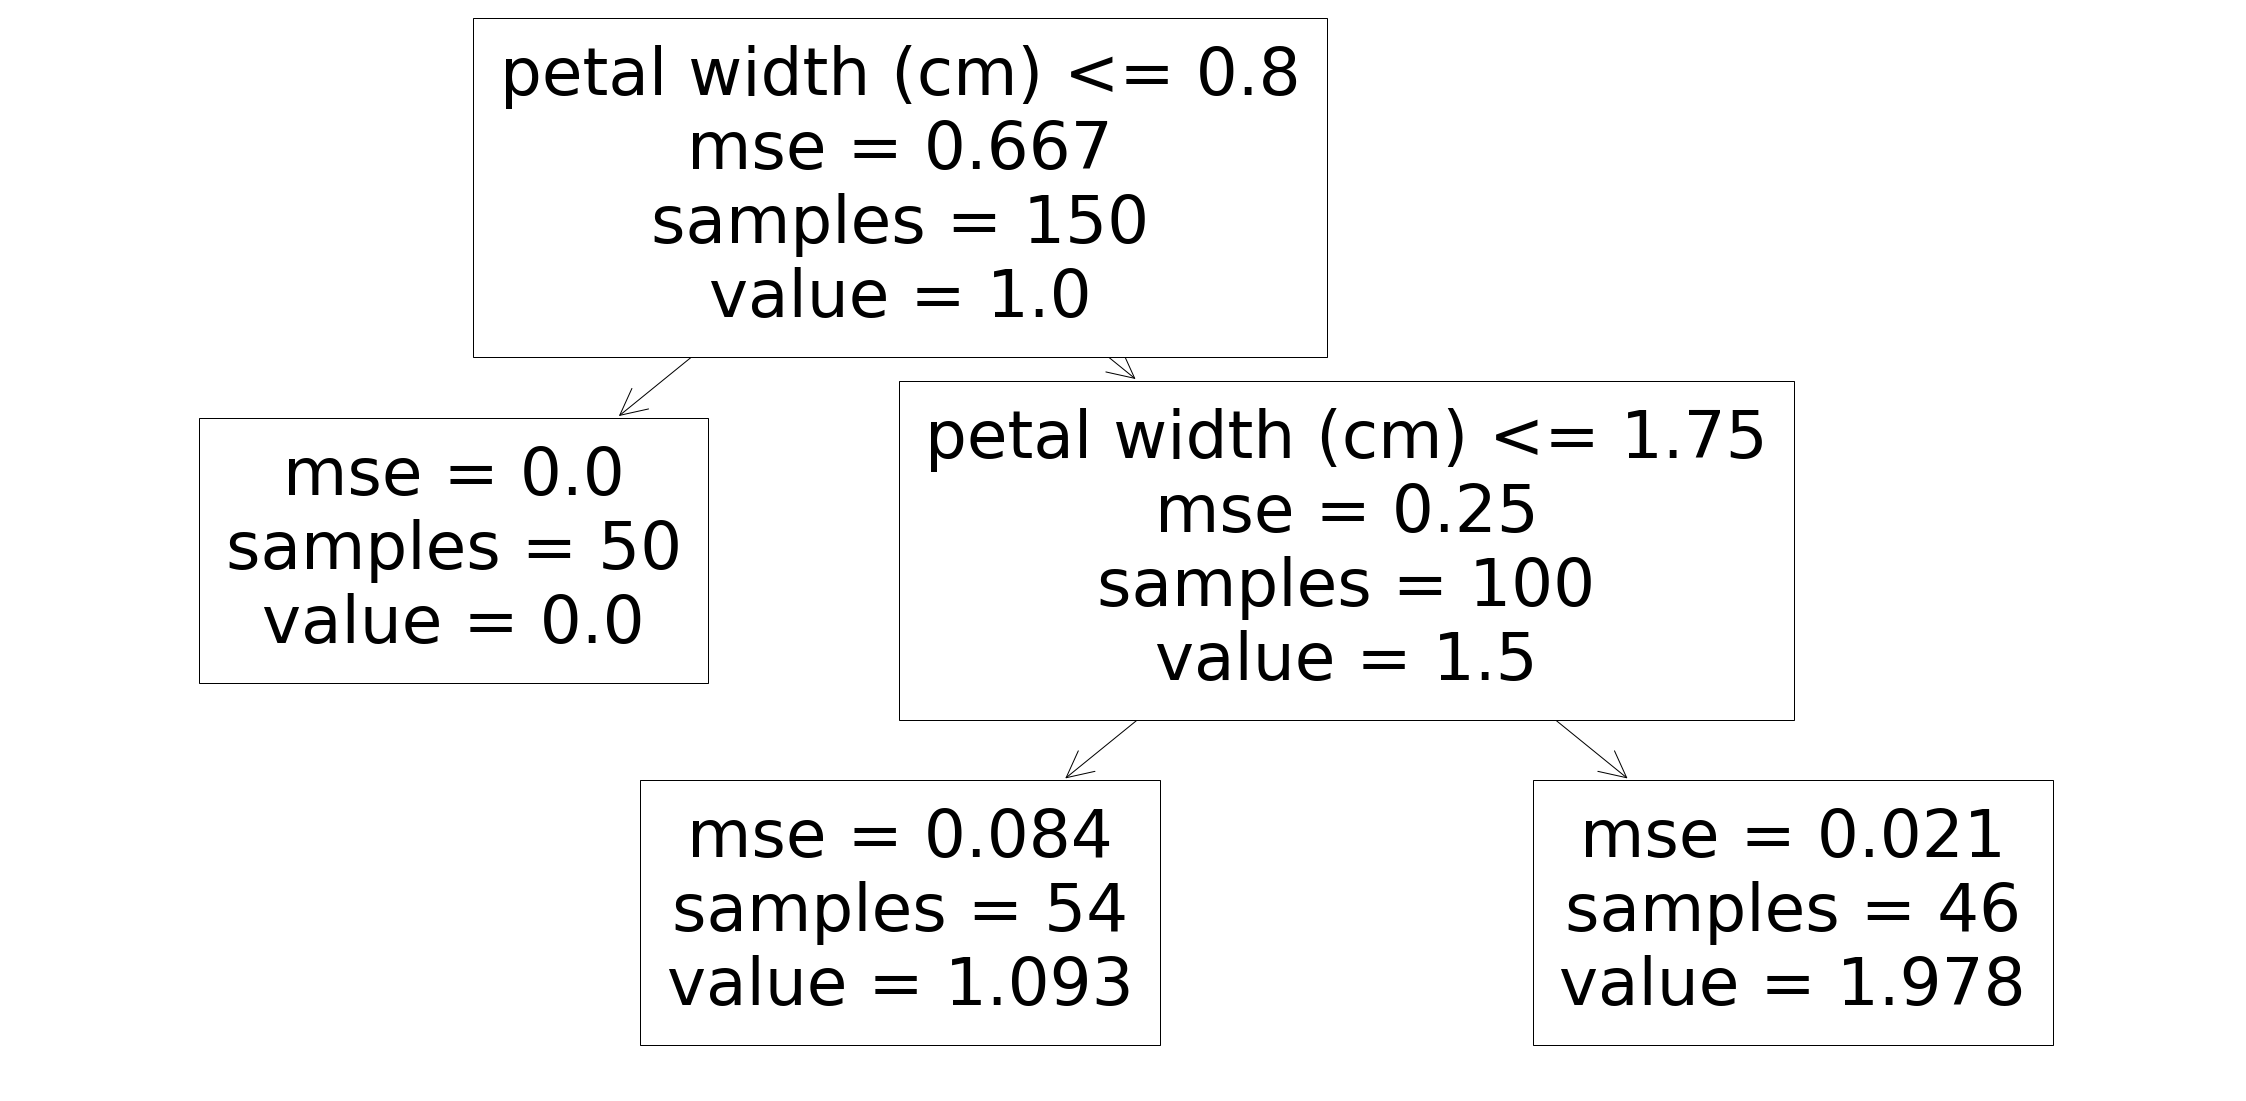

In [10]:
# first tree

from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(40,20))  # customize according to the size of your tree
_ = tree.plot_tree(tree_reg1, feature_names = iris["feature_names"])
plt.show()

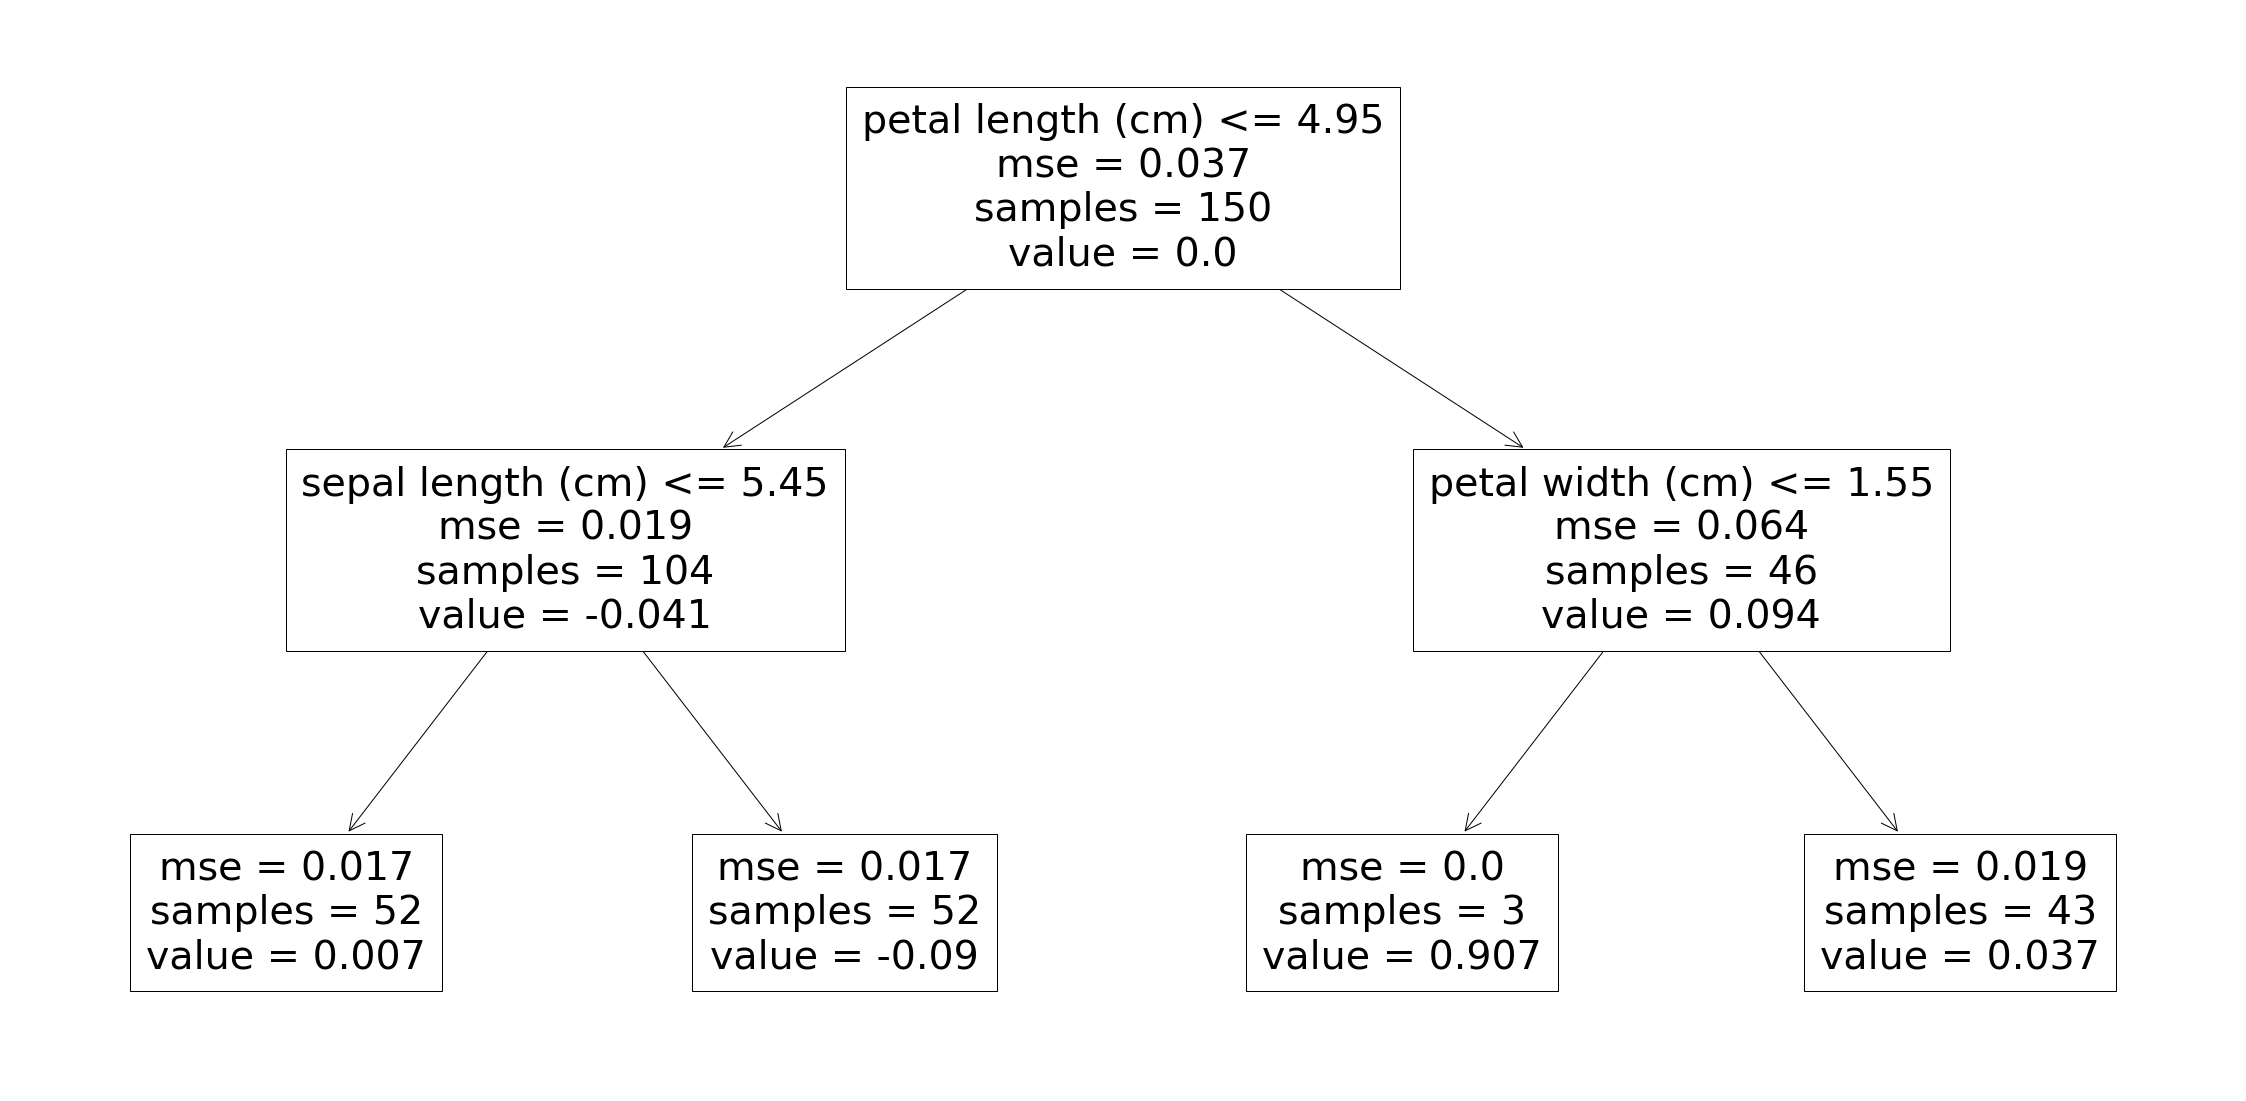

In [11]:
# second tree, mostly where we are comitting errors

from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(40,20))  # customize according to the size of your tree
_ = tree.plot_tree(tree_reg2, feature_names = iris["feature_names"])
plt.show()

In [13]:
# optimal number of trees - straged predict
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor


X_train, X_val, y_train, y_val = train_test_split(X, y)
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)

gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)


GradientBoostingRegressor(max_depth=2, n_estimators=32)

In [16]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)
min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break # early stopping